# Aufgabe 7.1

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 14 14:22:37 2021

@author: Marvin Nöller
"""

# Importieren der benötigten Pakete
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Einlesen der Daten
data = pd.read_excel("wage.xlsx","Sheet1")
#print(data)
print(data.info())
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

## a) Log und quadrat columns erstellen
modifikation mit np.log() und np.square()

In [3]:
# Erstellen der Variablen log(wage) und exper^2. Hierzu benötigen wir das
# package numpy, welches wir oben als np geladen haben
data['lwage'] = np.log(data['wage']) #membuat log pada column
data['expersq'] = np.square(data['exper']) #membaut quadrat pada column

# Abhängige Variable
y = data[['lwage']]
# Erklärende Variablen inkl. Konstante
x = data[['educ', 'exper', 'expersq']]
x = pd.DataFrame(sm.add_constant(x.values, has_constant='add'), \
                    columns = ['constant'] + x.columns.tolist())

# Schätzung des Modells
mincer = sm.OLS(y,x).fit()
print(mincer.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     74.67
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           3.38e-40
Time:                        14:18:32   Log-Likelihood:                -319.53
No. Observations:                 526   AIC:                             647.1
Df Residuals:                     522   BIC:                             664.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.1280      0.106      1.208      0.2

## b) Bestimmtheitsmaß


In [9]:
# Das R2 wird im Schätzoutput gespeichert
print('R2: ', mincer.rsquared)

R2:  0.3002726742160787



## c) Signifikanzsniveau von 1% test


In [11]:
# p-Wert aus Schätzoutput nehmen
p_value_expersq = mincer.pvalues['expersq']
# Signifikanzlevel festlegen
sig_level_c = 0.01
print(p_value_expersq)
# Test Entscheidung
if p_value_expersq < sig_level_c:
    print('beta_3 ist signifikant verschieden von Null')
elif p_value_expersq >= sig_level_c:
    print('beta_3 ist nicht signifikant verschieden von Null')

1.4211755999805214e-09
beta_3 ist signifikant verschieden von Null



## d)


In [12]:
# Die beiden Level an experience festlegen
exper_level_1 = 4
exper_level_2 = 19

# Marginalen Effekt mit Hilfe der Schätzergebnisse ausrechnen
# manuell ausrechnen
marg_effect_1 = mincer.params['exper'] \
                + 2 * mincer.params['expersq'] * exper_level_1

marg_effect_2 = mincer.params['exper'] \
                + 2 * mincer.params['expersq'] * exper_level_2

print('Marginaler Effekt für experience von ',exper_level_1 ,': ', marg_effect_1)
print('Marginaler Effekt für experience von ',exper_level_2 ,': ', marg_effect_2)

Marginaler Effekt für experience von  4 :  0.03530040978032391
Marginaler Effekt für experience von  19 :  0.01389366522263924



## e)


Text(0, 0.5, 'log-Lohn')

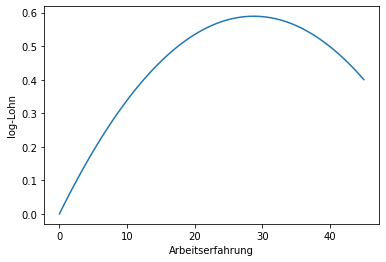

In [14]:
######### Den restlichen Code müssen Sie nicht können ########################

# Grid für mögliche Werte an Erfahrung
grid_exper = np.linspace(0,45,100)
# Damit einhergehender Lohn laut Schätzung
grid_log_wage = mincer.params['exper'] * grid_exper \
              + mincer.params['expersq'] * grid_exper**2

# Plot
plt.plot(grid_exper, grid_log_wage)
plt.xlabel('Arbeitserfahrung')
plt.ylabel('log-Lohn')